 Exercise 1: Gaussian Filtering and Noise Estimation (Spatial Filtering)

Load Image and Convert to Grayscale

(np.float64(-0.5), np.float64(399.5), np.float64(399.5), np.float64(-0.5))

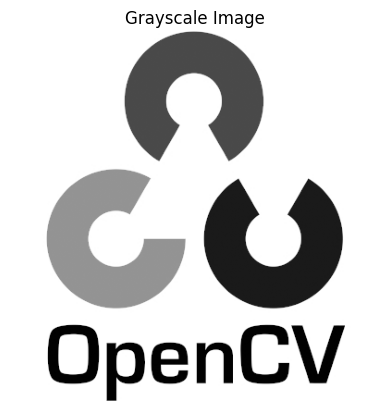

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the color image
image = cv2.imread("//content/opencv_logo.jpg")

# Convert BGR to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Display grayscale image
plt.imshow(gray, cmap='gray')
plt.title("Grayscale Image")
plt.axis("off")


Add Gaussian Noise

(np.float64(-0.5), np.float64(399.5), np.float64(399.5), np.float64(-0.5))

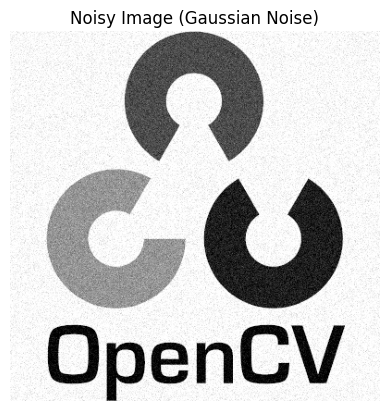

In [12]:
# Generate Gaussian noise
sigma = 15
gaussian_noise = np.random.normal(0, sigma, gray.shape)

# Add noise to the grayscale image
noisy_image = gray.astype(np.float32) + gaussian_noise

# Clip values to valid range
noisy_image = np.clip(noisy_image, 0, 255).astype(np.uint8)

# Display noisy image
plt.imshow(noisy_image, cmap='gray')
plt.title("Noisy Image (Gaussian Noise)")
plt.axis("off")


Apply Gaussian Blur

(np.float64(-0.5), np.float64(399.5), np.float64(399.5), np.float64(-0.5))

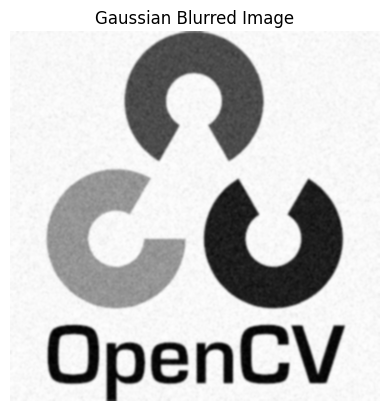

In [13]:
# Apply Gaussian blur with 5x5 kernel
blurred_image = cv2.GaussianBlur(noisy_image, (5, 5), 0)

# Display blurred image
plt.imshow(blurred_image, cmap='gray')
plt.title("Gaussian Blurred Image")
plt.axis("off")


Compute Residual Noise

In [14]:
# Compute residual noise
residual_noise = noisy_image.astype(np.float32) - blurred_image.astype(np.float32)

# Compute mean absolute residual
mean_residual = np.mean(np.abs(residual_noise))

print("Mean Residual Noise:", mean_residual)


Mean Residual Noise: 9.379694


Display All Images

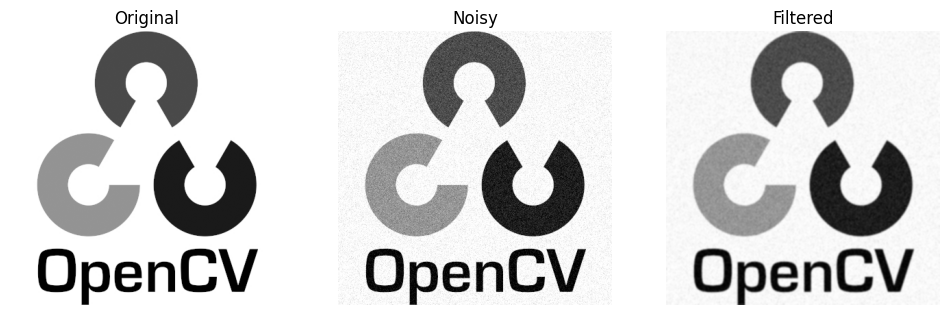

In [15]:
plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
plt.imshow(gray, cmap='gray')
plt.title("Original")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(noisy_image, cmap='gray')
plt.title("Noisy")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(blurred_image, cmap='gray')
plt.title("Filtered")
plt.axis("off")

plt.show()


Exercise 2: Edge Sharpening Using Sobel Operator

Load Grayscale Image

(np.float64(-0.5), np.float64(189.5), np.float64(264.5), np.float64(-0.5))

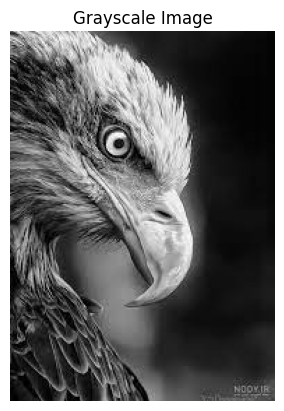

In [16]:
# Load grayscale image
gray = cv2.imread("/content/eagle.jpeg", cv2.IMREAD_GRAYSCALE)

plt.imshow(gray, cmap='gray')
plt.title("Grayscale Image")
plt.axis("off")


Compute Sobel Gradients

In [17]:
# Compute Sobel gradients in X and Y directions
sobel_x = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)

# Compute gradient magnitude
gradient_magnitude = np.sqrt(sobel_x**2 + sobel_y**2)


Normalize Gradient Magnitude

(np.float64(-0.5), np.float64(189.5), np.float64(264.5), np.float64(-0.5))

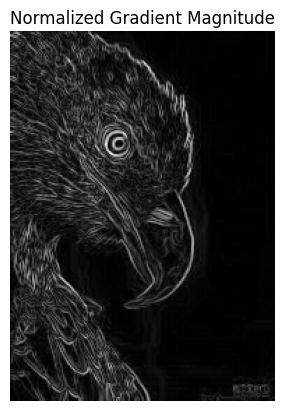

In [18]:
# Normalize gradient magnitude to [0, 255]
gradient_norm = cv2.normalize(
    gradient_magnitude, None, 0, 255, cv2.NORM_MINMAX
).astype(np.uint8)

plt.imshow(gradient_norm, cmap='gray')
plt.title("Normalized Gradient Magnitude")
plt.axis("off")


Sharpen Image

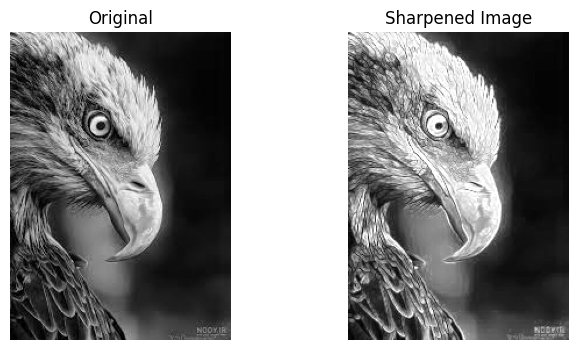

In [19]:
# Add gradient to original image for sharpening
sharpened_image = cv2.add(gray, gradient_norm)

plt.figure(figsize=(8,4))

plt.subplot(1,2,1)
plt.imshow(gray, cmap='gray')
plt.title("Original")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(sharpened_image, cmap='gray')
plt.title("Sharpened Image")
plt.axis("off")

plt.show()


Exercise 3: Binary Image Cleaning Using Morphological Operations

Load Image & Convert to Grayscale

(np.float64(-0.5), np.float64(499.5), np.float64(581.5), np.float64(-0.5))

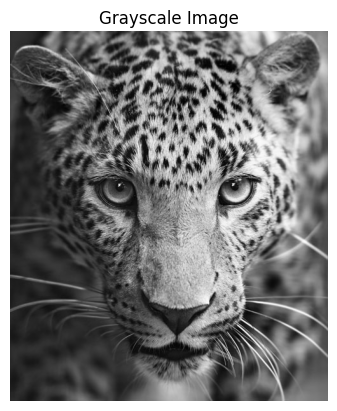

In [25]:
# Load image
image = cv2.imread("/content/lion.jpg")

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.imshow(gray, cmap='gray')
plt.title("Grayscale Image")
plt.axis("off")


Apply Thresholding

(np.float64(-0.5), np.float64(499.5), np.float64(581.5), np.float64(-0.5))

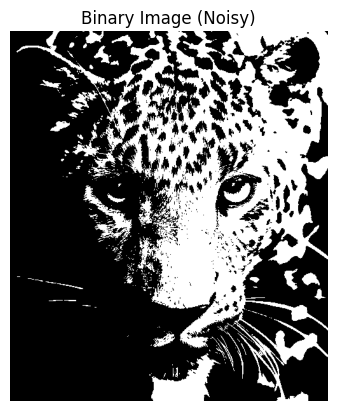

In [26]:
# Apply binary thresholding
_, binary = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

plt.imshow(binary, cmap='gray')
plt.title("Binary Image (Noisy)")
plt.axis("off")


Define Structuring Element

In [27]:
# Define a 3x3 structuring element
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))


Apply Opening and Closing

In [28]:
# Apply opening to remove small white noise
opened = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel)

# Apply closing to fill small black holes
cleaned = cv2.morphologyEx(opened, cv2.MORPH_CLOSE, kernel)


Display Results

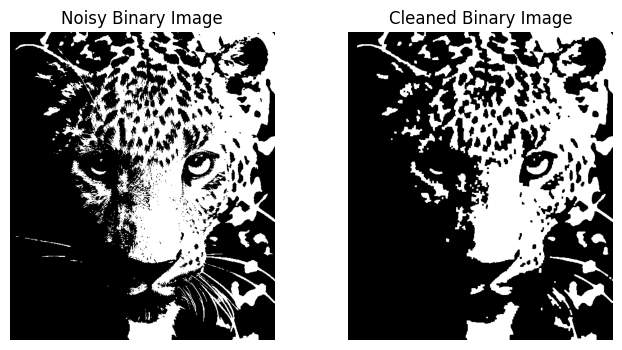

In [29]:
plt.figure(figsize=(8,4))

plt.subplot(1,2,1)
plt.imshow(binary, cmap='gray')
plt.title("Noisy Binary Image")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(cleaned, cmap='gray')
plt.title("Cleaned Binary Image")
plt.axis("off")

plt.show()
